In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\course\ML Notes\DATA\penguins_size.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [29]:
X = pd.get_dummies(df.drop('species', axis = 1)).astype(int)

In [30]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39,18,181,3750,0,0,1,0,0,1
1,39,17,186,3800,0,0,1,0,1,0
2,40,18,195,3250,0,0,1,0,1,0
4,36,19,193,3450,0,0,1,0,1,0
5,39,20,190,3650,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,47,13,214,4925,1,0,0,0,1,0
340,46,14,215,4850,1,0,0,0,1,0
341,50,15,222,5750,1,0,0,0,0,1
342,45,14,212,5200,1,0,0,0,1,0


In [31]:
y = df['species']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [39]:
preds = rfc.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [46]:
cm = confusion_matrix(y_test,preds)

In [47]:
rfc.feature_importances_

array([0.4953246 , 0.0592994 , 0.13583676, 0.0243061 , 0.17632109,
       0.10261504, 0.00304178, 0.        , 0.00267364, 0.0005816 ])

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)

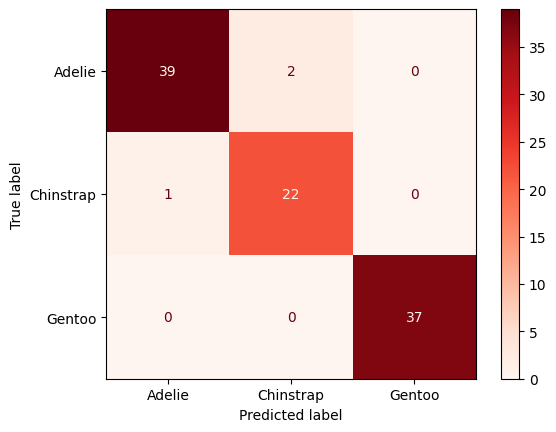

In [57]:
disp.plot(cmap= plt.cm.Reds)

In [58]:
rfc.feature_importances_

array([0.4953246 , 0.0592994 , 0.13583676, 0.0243061 , 0.17632109,
       0.10261504, 0.00304178, 0.        , 0.00267364, 0.0005816 ])